In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import LabelEncoder
import operator 
from sklearn.model_selection import train_test_split
from nameparser import HumanName
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors

In [3]:
# Loading the data.
train_data = pd.read_csv("train.csv") 
test_data = pd.read_csv("test.csv") 

In [4]:
#### Data PreProcessing and Exploration #####

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Reading the top 5 instances in the train_Data set
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# count of Data Missing from the Train_dataset
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Age is missing about 20% of its data, hopefully we will be able to use other data to provide a fair guess as to what those ages should be.
# Cabin is missing most of its data, but we might be able to learn something from the information that we have. 
# Embarked is missing just two values, that won't be a problem.

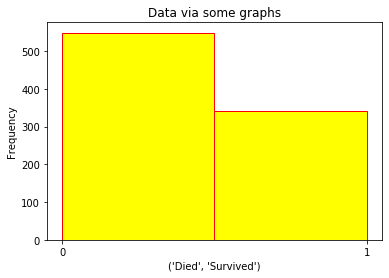

In [9]:
train_data.Survived.plot(kind='hist', bins = 2, edgecolor = 'red', color='yellow')
plt.xticks((1, 0))
plt.xlabel(('Died','Survived'))
plt.title('Data via some graphs')
plt.show()

In [10]:
lst = train_data.Survived.value_counts()
print("Number of people died = ",lst[0])
print("Number of people survived = ",lst[1])
print("Percentage of Survival = ",(lst[1]/(lst[0]+lst[1]))*100," %")

Number of people died =  549
Number of people survived =  342
Percentage of Survival =  38.38383838383838  %


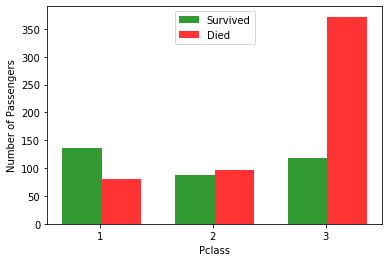

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [11]:
# -----------------------------------------------Based on PClass ----------------------------------------------------- 
n = 3
index = np.arange(n)

bar_width = 0.35
opacity = 0.8

PClassSurvived = train_data[train_data.Survived==1].Pclass.value_counts().sort_index()
PClassDied = train_data[train_data.Survived==0].Pclass.value_counts().sort_index()
plt.bar(index, PClassSurvived, bar_width, alpha=opacity, color='g', label='Survived')
plt.bar(index+bar_width, PClassDied, bar_width, alpha=opacity, color='r', label='Died')
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.legend(loc = 9)
plt.xticks(index + 0.16, (1,2,3))
plt.show()
print(pd.crosstab(train_data.Pclass, train_data.Survived))

In [12]:
# Looks like you don't want to be in third class. 
# I wonder what happens when we factor in gender as well.

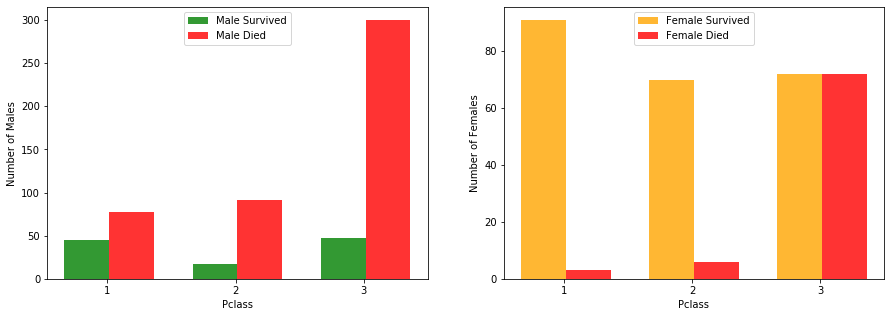


Male Values :

Survived    0   1
Pclass           
1          77  45
2          91  17
3         300  47

Female Values :

Survived   0   1
Pclass          
1          3  91
2          6  70
3         72  72

Upper and middle class women mostly survived, not so much for the lower class.None of the men did particularly well, especially those in the lower class.


In [13]:
# -------------------------------------------- Based on PClass And Gender ----------------------------------------------------- 
train_Male = train_data[train_data.Sex == 'male']
train_Female = train_data[train_data.Sex == 'female']

PClass_Survived_Male = train_Male[train_data.Survived==1].Pclass.value_counts().sort_index()
PClass_Survived_Female = train_Female[train_data.Survived==1].Pclass.value_counts().sort_index()
PClass_Died_Male = train_Male[train_data.Survived==0].Pclass.value_counts().sort_index()
PClass_Died_Female = train_Female[train_data.Survived==0].Pclass.value_counts().sort_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
PclassM1 = axes[0].bar(index, PClass_Survived_Male, bar_width,alpha=opacity,color='green',label='Male Survived')
PclassM0 = axes[0].bar(index + bar_width, PClass_Died_Male, bar_width,alpha=opacity,color='red', label='Male Died')
PclassF1 = axes[1].bar(index , PClass_Survived_Female, bar_width,alpha=opacity,color='orange', label='Female Survived')
PclassM0 = axes[1].bar(index + bar_width, PClass_Died_Female, bar_width,alpha=opacity,color='red', label='Female Died')

axes[0].legend(loc = 9)
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Number of Males')
axes[1].legend(loc = 9)
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Number of Females')
plt.setp(axes, xticks = index + 0.16, xticklabels=['1', '2', '3'])
plt.show()
print("\nMale Values :\n",pd.crosstab(train_Male.Pclass, train_Male.Survived),sep="\n")
print("\nFemale Values :\n",pd.crosstab(train_Female.Pclass, train_Female.Survived),sep="\n")
print("\nUpper and middle class women mostly survived, not so much for the lower class.None of the men did particularly well, especially those in the lower class.")

In [14]:
#To get a better general sense, let's compare the survival of men and women.

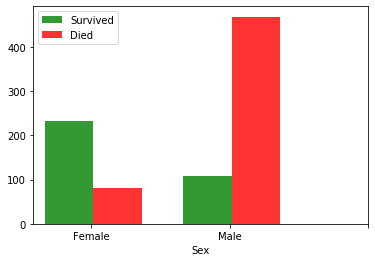

Total Number of People in each Sex : 
Survived    0    1
Sex               
female     81  233
male      468  109

As expected, women typically survived and men did not.


In [15]:
n1 = 2
index1=np.arange(n1)

SexSurvived = train_data[train_data.Survived==1].Sex.value_counts().sort_index()
SexDied = train_data[train_data.Survived==0].Sex.value_counts().sort_index()

Sex1 = plt.bar(index1, SexSurvived, bar_width,alpha=opacity,color='green',label='Survived')
Sex0 = plt.bar(index1 + bar_width, SexDied, bar_width,alpha=opacity,color='red',label='Died')
plt.xticks(index + 0.16, ('Female', 'Male'))
plt.xlabel("Sex")
    
plt.legend(loc = 2)
plt.show()
print("Total Number of People in each Sex : ")
print(pd.crosstab(train_data.Sex, train_data.Survived))
print("\nAs expected, women typically survived and men did not.")

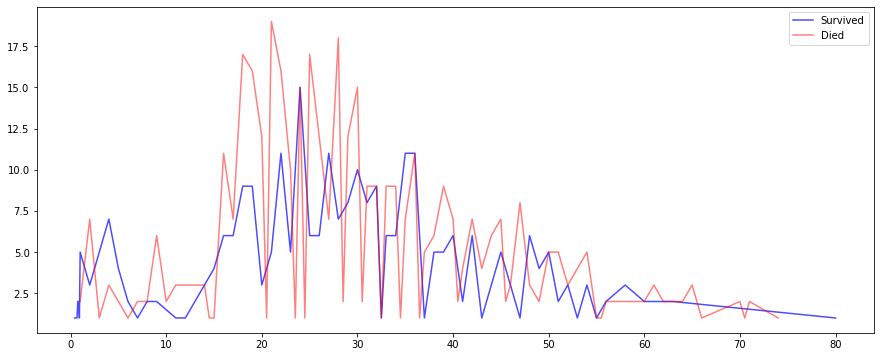

It seems that death is more common.


In [16]:
# Let's move on to Ages, and see how things worked out there.
fig = plt.figure(figsize=(15, 6))
AgeSurvived = train_data[train_data.Survived == 1].Age.value_counts().sort_index()
AgeDied =  train_data[train_data.Survived == 0].Age.value_counts().sort_index()
plt.plot(AgeSurvived,label='Survived',c='b',alpha=0.7)
plt.plot(AgeDied,label='Died',c='red',alpha=0.5)
plt.legend(loc=1)
plt.show()
print("It seems that death is more common.")

In [17]:
print("Now let take care of those ",train_data.Age.isnull().sum()," Age Null entires")

Now let take care of those  177  Age Null entires


In [18]:
print("One idea would be to take the median age:", train_data.Age.median(), "or mean:", train_data.Age.mean(), "but I think we can get a clue from people's titles (ex Mr., Mrs.)")

One idea would be to take the median age: 28.0 or mean: 29.69911764705882 but I think we can get a clue from people's titles (ex Mr., Mrs.)


In [19]:
titles = []
for name in train_data.Name:
    titles.append(HumanName(name).title)
print(set(titles))

{'', 'Col.', 'Sir.', 'Mme.', 'Mrs.', 'Rev.', 'Capt.', 'Dr.', 'the Countess. of', 'Lady.', 'Mr.', 'Miss.', 'Mlle.', 'Ms.', 'Master.'}


In [20]:
train_data.Title = train_data.Name.map(lambda x: HumanName(x).title)

print(train_data[train_data.Title == ''].Sex)
print(train_data[train_data.Title == ''].Survived)

30     male
449    male
536    male
822    male
Name: Sex, dtype: object
30     0
449    1
536    0
822    0
Name: Survived, dtype: int64


In [21]:
titleAges = {}
for title in train_data.Title:
    if title not in titleAges:
        titleAges[title] = train_data[train_data.Title == title].Age.median()
print(titleAges)

{'Mr.': 30.0, 'Mrs.': 35.0, 'Miss.': 21.0, 'Master.': 3.5, '': 42.5, 'Rev.': 46.5, 'Dr.': 46.5, 'Mme.': 24.0, 'Ms.': 28.0, 'Lady.': 48.0, 'Sir.': 49.0, 'Mlle.': 24.0, 'Col.': 58.0, 'Capt.': 70.0, 'the Countess. of': 33.0}


In [22]:
#Now we can add the median age of the respective title to the passengers who do not have an age.

for title in train_data.Title:
    train_data.Age = train_data.Age.fillna(titleAges[title])

In [23]:
#After adding the missing ages 
print("Number of rows with missing age in Train Dataframe = ",len(train_data[train_data.Age == '']))

Number of rows with missing age in Train Dataframe =  0


In [24]:
#same for the test dataframe, to keep things equal.
test_data.Title = test_data.Name.map(lambda x: HumanName(x).title)
testTitleAges = {}
for title in test_data.Title:
    if title not in testTitleAges:
        testTitleAges[title] = test_data[test_data.Title == title].Age.median()
for title in test_data.Title:
    test_data.Age = test_data.Age.fillna(testTitleAges[title])
print("Number of rows with missing age in Test Dataframe  = ",len(train_data[train_data.Age == '']))

Number of rows with missing age in Test Dataframe  =  0


In [25]:
# let's move on to SibSp (siblings and spouses)

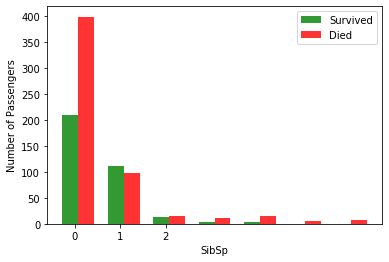

Number of people in each SibSp group:

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0

Things were decent for SibSp as 1 , otherwise not too good


In [26]:
n_groups1 = 5
index1 = np.arange(n_groups1)
n_groups2 = 7
index2 = np.arange(n_groups2)

SSSurvived = train_data[train_data.Survived==1].SibSp.value_counts().sort_index()
SSDied = train_data[train_data.Survived==0].SibSp.value_counts().sort_index()

SS1 = plt.bar(index1, SSSurvived, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')
plt.xticks(index + 0.1, (0,1,2,3,4,5,8))

SS0 = plt.bar(index2 + bar_width, SSDied, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')

plt.xlabel("SibSp")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()
print("Number of people in each SibSp group:\n")
print(pd.crosstab(train_data.SibSp, train_data.Survived))
print("\nThings were decent for SibSp as 1 , otherwise not too good")

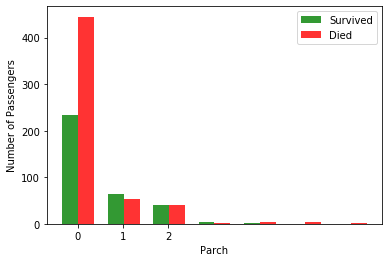

Number of people in each Parch group:
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0

Hmmmm, Results looks very similar to the SibSp plot/values.


In [27]:
#to Parch (parents and children).
n_groups1 = 5
index1 = np.arange(n_groups1)
n_groups2 = 7
index2 = np.arange(n_groups2)

PCSurvived = train_data[train_data.Survived==1].Parch.value_counts().sort_index()
PCDied = train_data[train_data.Survived==0].Parch.value_counts().sort_index()

PC1 = plt.bar(index1, PCSurvived, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')

PC0 = plt.bar(index2 + bar_width, PCDied, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')

plt.xlabel("Parch")
plt.legend()
plt.xticks(index + 0.16, (0,1,2,3,4,5,6))
plt.ylabel("Number of Passengers")
plt.show()
print("Number of people in each Parch group:")
print(pd.crosstab(train_data.Parch, train_data.Survived))
print("\nHmmmm, Results looks very similar to the SibSp plot/values.")

In [28]:
train_data['FamilyMembers'] = (train_data.SibSp + train_data.Parch)
test_data['FamilyMembers'] = (test_data.SibSp + test_data.Parch)

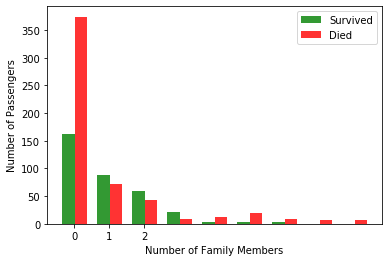

Number of people in each Family Member size:
Survived         0    1
FamilyMembers          
0              374  163
1               72   89
2               43   59
3                8   21
4               12    3
5               19    3
6                8    4
7                6    0
10               7    0

Things don't look too good for solo travellers or larger families, but those with 1-3 family members do rather well.


In [29]:
#On the Basis of FamilyMembers 
n_groups1 = 7
index1 = np.arange(n_groups1)
n_groups2 = 9
index2 = np.arange(n_groups2)

FamilySurvived = train_data[train_data.Survived==1].FamilyMembers.value_counts().sort_index()
FamilyDied = train_data[train_data.Survived==0].FamilyMembers.value_counts().sort_index()

F1 = plt.bar(index1, FamilySurvived, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')

F0 = plt.bar(index2 + bar_width, FamilyDied, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')

plt.xlabel("Number of Family Members")
plt.ylabel("Number of Passengers")
plt.legend()
plt.xticks(index + 0.16, (0,1,2,3,4,5,6,7,10))
plt.show()
print("Number of people in each Family Member size:")
print(pd.crosstab(train_data.FamilyMembers, train_data.Survived))
print("\nThings don't look too good for solo travellers or larger families, but those with 1-3 family members do rather well.")

In [30]:
print(train_data.Ticket.value_counts())
print("\nIt's interesting to see that some people have the same ticket number, perhaps they are a part of the same family?")

CA. 2343             7
347082               7
1601                 7
3101295              6
CA 2144              6
347088               6
382652               5
S.O.C. 14879         5
113781               4
W./C. 6608           4
PC 17757             4
349909               4
2666                 4
347077               4
4133                 4
113760               4
LINE                 4
19950                4
17421                4
29106                3
PC 17572             3
230080               3
PC 17582             3
35273                3
110152               3
239853               3
SC/Paris 2123        3
347742               3
371110               3
C.A. 31921           3
                    ..
11774                1
345780               1
SC/AH 29037          1
367229               1
13049                1
371362               1
2649                 1
347069               1
239855               1
364506               1
368703               1
PC 17473             1
2663       

In [31]:
print(train_data[train_data.Ticket == 'CA. 2343'].Name, train_data[train_data.Ticket == 'CA. 2343'].Survived)

159           Sage, Master. Thomas Henry
180         Sage, Miss. Constance Gladys
201                  Sage, Mr. Frederick
324             Sage, Mr. George John Jr
792              Sage, Miss. Stella Anna
846             Sage, Mr. Douglas Bullen
863    Sage, Miss. Dorothy Edith "Dolly"
Name: Name, dtype: object 159    0
180    0
201    0
324    0
792    0
846    0
863    0
Name: Survived, dtype: int64


In [32]:
print(train_data.Fare.describe(),"\n")
print(train_data.Fare.value_counts().sort_index(ascending = False))
print("\nSome of those fare values are pretty high, mainly 512, which is nearly double the next highest value. There are 15 people who didn't pay anything. Let's look into those two things")

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64 

512.3292     3
263.0000     4
262.3750     2
247.5208     2
227.5250     4
221.7792     1
211.5000     1
211.3375     3
164.8667     2
153.4625     3
151.5500     4
146.5208     2
135.6333     3
134.5000     2
133.6500     2
120.0000     4
113.2750     3
110.8833     4
108.9000     2
106.4250     2
93.5000      2
91.0792      2
90.0000      4
89.1042      2
86.5000      3
83.4750      2
83.1583      3
82.1708      2
81.8583      1
80.0000      2
            ..
7.7417       1
7.7375       2
7.7333       4
7.7292       1
7.7250       1
7.6500       4
7.6292       1
7.5500       4
7.5208       1
7.4958       3
7.3125       1
7.2500      13
7.2292      15
7.2250      12
7.1417       1
7.1250       4
7.0542       2
7.0500       7
7.0458       1
6.9750       2
6.9500       1
6.8583       1
6.7500       2
6

In [33]:
print("Names of the people with Fare = 512.329200 are :\n\n",train_data[train_data.Fare==512.329200].Name,sep="")
print("Names of the people with Fare = 0.00 are :\n\n",train_data[train_data.Fare==0].Name,sep="")

Names of the people with Fare = 512.329200 are :

258                      Ward, Miss. Anna
679    Cardeza, Mr. Thomas Drake Martinez
737                Lesurer, Mr. Gustave J
Name: Name, dtype: object
Names of the people with Fare = 0.00 are :

179                 Leonard, Mr. Lionel
263               Harrison, Mr. William
271        Tornquist, Mr. William Henry
277         Parkes, Mr. Francis "Frank"
302     Johnson, Mr. William Cahoone Jr
413      Cunningham, Mr. Alfred Fleming
466               Campbell, Mr. William
481    Frost, Mr. Anthony Wood "Archie"
597                 Johnson, Mr. Alfred
633       Parr, Mr. William Henry Marsh
674          Watson, Mr. Ennis Hastings
732                Knight, Mr. Robert J
806              Andrews, Mr. Thomas Jr
815                    Fry, Mr. Richard
822     Reuchlin, Jonkheer. John George
Name: Name, dtype: object


In [34]:
#let's see if the last names match up with anyone. As for the people who paid 512 for a ticket, I'm just going to leave them alone, I suppose they just had the best rooms on the boat.
FareNames = []
for name in train_data[train_data.Fare == 512.3292].Name:
    FareNames.append(name)
for name in train_data[train_data.Fare == 0].Name:
    FareNames.append(name)

for FareName in FareNames:
    for name in train_data.Name:
        if HumanName(FareName).last == HumanName(name).last:
            print(FareName, " ------ ", name)

Ward, Miss. Anna  ------  Ward, Miss. Anna
Cardeza, Mr. Thomas Drake Martinez  ------  Cardeza, Mr. Thomas Drake Martinez
Lesurer, Mr. Gustave J  ------  Lesurer, Mr. Gustave J
Leonard, Mr. Lionel  ------  Leonard, Mr. Lionel
Harrison, Mr. William  ------  Harrison, Mr. William
Tornquist, Mr. William Henry  ------  Tornquist, Mr. William Henry
Parkes, Mr. Francis "Frank"  ------  Parkes, Mr. Francis "Frank"
Johnson, Mr. William Cahoone Jr  ------  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Johnson, Mr. William Cahoone Jr  ------  Johnson, Miss. Eleanor Ileen
Johnson, Mr. William Cahoone Jr  ------  Johnson, Mr. William Cahoone Jr
Johnson, Mr. William Cahoone Jr  ------  Johnson, Mr. Alfred
Johnson, Mr. William Cahoone Jr  ------  Johnson, Mr. Malkolm Joackim
Johnson, Mr. William Cahoone Jr  ------  Johnson, Master. Harold Theodor
Cunningham, Mr. Alfred Fleming  ------  Cunningham, Mr. Alfred Fleming
Campbell, Mr. William  ------  Campbell, Mr. William
Frost, Mr. Anthony Wood "Ar

In [35]:
print("NAME ------------------- FARE")
for name in train_data.Name:
    if 'Johnson' in name or 'Andrews' in name:
        print(name, train_data[train_data.Name == name].Fare)
print("\n\nThere are some values here that we can match for the Johnsons and Andrews, but I want to see what their family sizes are, just to make sure that they are a member of these families.")

NAME ------------------- FARE
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) 8    11.1333
Name: Fare, dtype: float64
Johnson, Miss. Eleanor Ileen 172    11.1333
Name: Fare, dtype: float64
Andrews, Miss. Kornelia Theodosia 275    77.9583
Name: Fare, dtype: float64
Johnson, Mr. William Cahoone Jr 302    0.0
Name: Fare, dtype: float64
Johnson, Mr. Alfred 597    0.0
Name: Fare, dtype: float64
Johnson, Mr. Malkolm Joackim 719    7.775
Name: Fare, dtype: float64
Hogeboom, Mrs. John C (Anna Andrews) 765    77.9583
Name: Fare, dtype: float64
Andrews, Mr. Thomas Jr 806    0.0
Name: Fare, dtype: float64
Johnson, Master. Harold Theodor 869    11.1333
Name: Fare, dtype: float64


There are some values here that we can match for the Johnsons and Andrews, but I want to see what their family sizes are, just to make sure that they are a member of these families.


In [36]:
print(train_data[train_data.Name == 'Johnson, Mr. William Cahoone Jr'].FamilyMembers)
print(train_data[train_data.Name == 'Johnson, Mr. Alfred'].FamilyMembers)
print(train_data[train_data.Name == 'Andrews, Mr. Thomas Jr'].FamilyMembers)
print("\n\nThat's somewhat surprising. It looks as though none of these men are members of those families. Since there aren't many people with a fare value of 0, I'm going to assign their new values to the median.")

302    0
Name: FamilyMembers, dtype: int64
597    0
Name: FamilyMembers, dtype: int64
806    0
Name: FamilyMembers, dtype: int64


That's somewhat surprising. It looks as though none of these men are members of those families. Since there aren't many people with a fare value of 0, I'm going to assign their new values to the median.


In [37]:
train_data.loc[train_data['Fare'] == 0, 'Fare'] = train_data.Fare.median()

In [38]:
#Next on the list is Cabins. Unfortunately, we are missing most of the information about cabins, but let's take another look at what we have.

In [39]:
train_data.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
C22 C26            3
F33                3
E101               3
F2                 3
D                  3
B57 B59 B63 B66    2
B20                2
E8                 2
B22                2
C123               2
D33                2
D20                2
C68                2
E33                2
B18                2
B49                2
E121               2
C65                2
C92                2
C125               2
F G73              2
C126               2
C2                 2
E24                2
B77                2
E67                2
E25                2
                  ..
C104               1
C95                1
E68                1
D19                1
B50                1
C30                1
D10 D12            1
C103               1
C148               1
E17                1
A36                1
F G63              1
B19                1
E12                1
C32                1
B79                1
B102         

In [40]:
print("I think something can be gained by sorting cabins based on their letter (which should represent the floor of the titanic they are on; higher floor = more wealthy = closer to life boats = more likely to survive).")

I think something can be gained by sorting cabins based on their letter (which should represent the floor of the titanic they are on; higher floor = more wealthy = closer to life boats = more likely to survive).


In [41]:
print(pd.crosstab(train_data.Embarked, train_data.Survived),"\n\nC = Cherbourg Q = Queenstown S = Southampton")

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217 

C = Cherbourg Q = Queenstown S = Southampton


In [42]:
print("It seems that the French were more likely to survive (C = Cherbourg, France)")

It seems that the French were more likely to survive (C = Cherbourg, France)


In [43]:
print(pd.crosstab(train_data.Embarked, train_data.Sex))
print("\nMales and females from Cherbourg who survived:")
print(train_data[(train_data.Embarked == 'C') & (train_data.Survived == 1)].Sex.value_counts())
print("\n",pd.crosstab(train_data.Embarked, train_data.Pclass))
print("\n",pd.crosstab(train_data.Embarked, train_data.FamilyMembers,))

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441

Males and females from Cherbourg who survived:
female    64
male      29
Name: Sex, dtype: int64

 Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353

 FamilyMembers   0    1   2   3   4   5   6   7   10
Embarked                                           
C               85   51  23   7   2   0   0   0   0
Q               57    9   6   0   0   5   0   0   0
S              393  101  73  22  13  17  12   6   7


In [44]:
print("Since More the 50% of the people boarded from Cherbourg were in PClass 1 so thats the reason which explains why more of them    survived !!!!! ")

Since More the 50% of the people boarded from Cherbourg were in PClass 1 so thats the reason which explains why more of them    survived !!!!! 


In [45]:
#Let's take care of those two missing values.
print(train_data[train_data.Embarked.isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  FamilyMembers  
61   female  38.0      0      0  113572  80.0   B28      NaN              0  
829  female  62.0      0      0  113572  80.0   B28      NaN              0  


In [46]:
train_data['Embarked'] = train_data['Embarked'].fillna('Empty')
train_data.loc[train_data['Embarked'] == 'Empty', 'Embarked'] = 'S'

In [47]:
# count of Data Missing from the Train_dataset
train_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
FamilyMembers      0
dtype: int64

In [48]:
#### Feature Selection And Extraction ####

In [49]:
def set_features(df):

    #need to give males and females numeric values 
    df.loc[df["Sex"] == "male", "Sex"] = 0
    df.loc[df["Sex"] == "female", "Sex"] = 1

    #need to give Embarked values, numeric values.
    #Set NAs to S as it is the most common port of departure.
    df['Embarked'] = df['Embarked'].fillna('S')
    df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
    df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
    df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

    #Set fare values of 0 and NaN to the median value of fare.
    df.loc[df['Fare'] == 0, 'Fare'] = df['Fare'].median()
    for value in df['Fare']:
        if pd.isnull(value):
            df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    #If someone has a sibling or spouse onboard, SibSp needs to be 1 or greater.
    df['Has_SibSp'] = df['SibSp'].map(lambda x: 1 if x >= 1 else 0)

    #To be a parent, you need a spouse, have at least 1 child, and be older than 18.
    #SibSp is >= 1 because you could be an adult with a sibling on board.
    df['Parent'] = (df['SibSp'] >= 1) & (df['Parch'] > 0) & (df['Age'] >= 18)

    #Single Parent can't have Spouse (duh) or siblings, minimum 1 kid, and 18 or older.
    df['Single_Parent'] = (df['SibSp'] == 0) & (df['Parch'] > 0) & (df['Age'] >= 18)

    #To be a mother, you need to be a parent and female. Fathers = Parent & Male
    df['Mother'] = (df['Parent'] == 1) & (df['Sex'] == 1)
    df['Father'] = (df['Parent'] == 1) & (df['Sex'] == 0)
    df['Single_Mother'] = (df['Single_Parent'] == 1) & (df['Sex'] == 1)
    df['Single_Father'] = (df['Single_Parent'] == 1) & (df['Sex'] == 0)

    #Child has at least 1 parent and is 17 or younger
    df['Child'] = (df['Parch'] >= 1) & (df['Age'] <= 17)

    #To be a daughter, you need to be a girl, and a child.
    #To be a son, likewise, but a boy.
    df['Daughter'] = (df['Sex'] == 1) & (df['Child'] == 1)
    df['Son'] = (df['Sex'] == 0) & (df['Child'] == 1)

    #Only child has no siblings, and is a child
    df['Only_Child'] = (df['Child'] == 1) & (df['SibSp'] == 0)

    #Orphan if you have no parents and are 17 or younger
    df['Orphan'] = (df['Age'] <= 17) & (df['Parch'] == 0)

    #To have 'One Parent', you need 1 parent and be 17 or younger
    df['One_Parent'] = (df['Parch'] == 1) & (df['Age'] <= 17)

    #Various life stages
    df['Infant'] = df['Age'] <= 2
    df['Kid'] = (df['Age'] > 3) & (df['Age'] <= 12)
    df['Teenager'] = (df['Age'] > 13) & (df['Age'] <= 17)
    df['Adult'] = df['Age'] >= 18

    #To be single, must be 18 or older, no parents/children, no siblings/spouses.
    df['Single_Man'] = (df['Sex'] == 0) & (df['Age'] >= 18) & (df['SibSp'] == 0) & (df['Parch'] == 0)
    df['Single_Woman'] = (df['Sex'] == 1) & (df['Age'] >= 18) & (df['SibSp'] == 0) & (df['Parch'] == 0)

    #Married without kids or parents, need to be at least 18, and have at least 1 sibling or spouse.
    df['Married_no_Kids_no_Parents'] = (df['SibSp'] >= 1) & (df['Parch'] == 0) & (df['Age'] >= 18)

    #NameLength is number of characters in someone's name
    df['NameLength'] = df['Name'].map(lambda x: len(x))
    #print df['NameLength'].describe()
    #Long names > 37, medium names 36-18, short names 0-17. Used describe to learn mean and standard deviation
    df['NameLengthGroup'] = df['NameLength'].map(lambda x: 3 if x > 37 else (2 if x > 18 else 1)) 
    df['FemaleLongName'] = (df['Sex'] == 1) & (df['NameLengthGroup'] == 3)
    df['FemaleMediumName'] = (df['Sex'] == 1) & (df['NameLengthGroup'] == 2)
    df['FemaleShortName'] = (df['Sex'] == 1) & (df['NameLengthGroup'] == 1)
    df['MaleLongName'] = (df['Sex'] == 0) & (df['NameLengthGroup'] == 3)
    df['MaleMediumName'] = (df['Sex'] == 0) & (df['NameLengthGroup'] == 2)
    df['MaleShortName'] = (df['Sex'] == 0) & (df['NameLengthGroup'] == 1)
    
    #Sort fares into three even categories.
    #print df['Fare'].describe()
    df['HighFare'] = df['Fare'] >= 31
    df['MediumFare'] = (df['Fare'] < 31) & (df['Fare'] > 8)
    df['LowFare'] = df['Fare'] <= 8

    #Combined class and gender to better organize people.
    df['RichWoman'] = (df['Pclass'] == 1) & (df['Sex'] == 1) & (df['Age'] >= 18)
    df['MiddleClassWoman'] = (df['Pclass'] == 2) & (df['Sex'] == 1) & (df['Age'] >= 18)
    df['PoorWoman'] = (df['Pclass'] == 3) & (df['Sex'] == 1) & (df['Age'] >= 18)
    df['RichMan'] = (df['Pclass'] == 1) & (df['Sex'] == 0) & (df['Age'] >= 18)
    df['MiddleClassMan'] = (df['Pclass'] == 2) & (df['Sex'] == 0) & (df['Age'] >= 18)
    df['PoorMan'] = (df['Pclass'] == 3) & (df['Sex'] == 0) & (df['Age'] >= 18)
    df['RichChild'] = (df['Pclass'] == 1) & (df['Age'] <= 17)
    df['MiddleClassChild'] = (df['Pclass'] == 2) & (df['Age'] <= 17)
    df['PoorChild'] = (df['Pclass'] == 3) & (df['Age'] <= 17)
    df['RichGirl'] = (df['RichChild'] == 1) & (df['Sex'] == 1)
    df['MiddleClassGirl'] = (df['MiddleClassChild'] == 1) & (df['Sex'] == 1)
    df['PoorGirl'] = (df['PoorChild'] == 1) & (df['Sex'] == 1)
    df['RichBoy'] = (df['RichChild'] == 1) & (df['Sex'] == 0)
    df['MiddleClassBoy'] = (df['MiddleClassChild'] == 1) & (df['Sex'] == 0)
    df['PoorBoy'] = (df['PoorChild'] == 1) & (df['Sex'] == 0)

    #Family size is the sum of siblings, spouses, parents, and children.
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['SmallFamily'] = df['FamilySize'] <= 3
    df['MediumFamily'] = (df['FamilySize'] >= 4) & (df['FamilySize'] <= 6)
    df['LargeFamily'] = df['FamilySize'] >= 7

    #Based on correlation and plot analysis, these features were combined; hoping for useful learning.
    df['Pclass*Age'] = df['Pclass'] * df['Age']
    df['Fare/Pclass'] = df['Fare'] / df['Pclass']
    df['FamilySize*Pclass'] = df['FamilySize'] * df['Pclass']

    #a helper function to provide ids to the variations of a variable.
    #the ids for each variation of the variable are stored in the variable_id_mapping (a dictionary)
    def id_mapping(variable_id, variable_id_mapping):
        if variable_id not in variable_id_mapping:
            if len(variable_id_mapping) == 0:
                current_id = 1
            else:
                current_id = (max(variable_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
            variable_id_mapping[variable_id] = current_id
        return variable_id_mapping[variable_id]

    #create a mapping of the title_ids
    title_id_mapping = {}
    def get_title_id(row):
        title = row["Name"].split(' ')[1]
        title_id = "{0}".format(title)
        return id_mapping(title_id, title_id_mapping)
    df["TitleID"] = df.apply(get_title_id, axis = 1)

    #cabin_level_ids relate to the first letter in the cabin column.
    cabin_level_id_mapping = {}
    def get_cabin_level(row):
        cabin_level = str(row['Cabin'])[0]
        cabin_level_id = "{0}".format(cabin_level)
        return id_mapping(cabin_level_id, cabin_level_id_mapping)
    df["CabinLevelID"] = df.apply(get_cabin_level, axis = 1)
    
    #If the cabin number is konwn, Known_cabin = 1, else 0
    df['Known_Cabin'] = df['Cabin'].map(lambda x: 1 if pd.notnull(x) else 0)
    
    #Find the length of the ticket, perhaps longer tickets are for include more amenities, 
    #therefore associated with wealth.
    df['TicketLength'] = df['Ticket'].map(lambda x: len(df['Ticket']))
    
    #ticket_id realtes to the first character in the ticket.
    ticket_id_mapping = {}
    def get_ticket_id(row):
        ticket = str(row['Ticket'])[0]
        ticket_id = "{0}".format(ticket)
        return id_mapping(ticket_id, ticket_id_mapping)
    df['TicketID'] = df.apply(get_ticket_id, axis = 1)
    
    #If there is no value for cabin, set it to 0.
    for value in df['Cabin']:
        if pd.isnull(value) or pd.isna(value):
            value = 0

    #dict to give each family a unique id
    family_id_mapping = {}
    def get_family_id(row):
        last_name = row['Name'].split(',')[0]
        family_id = "{0}{1}".format(last_name, row["FamilySize"])
        return id_mapping(family_id, family_id_mapping)
    df["FamilyID"]  = df.apply(get_family_id, axis = 1)

In [50]:
#### MACHINE LEARNING #####
set_features(train_data)
set_features(test_data)

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,LargeFamily,Pclass*Age,Fare/Pclass,FamilySize*Pclass,TitleID,CabinLevelID,Known_Cabin,TicketLength,TicketID,FamilyID
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,False,66.0,2.416667,3,1,1,0,891,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,False,38.0,71.283300,1,2,2,1,891,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,False,78.0,2.641667,0,3,1,0,891,3,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,False,35.0,53.100000,1,2,2,1,891,4,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,False,105.0,2.683333,0,1,1,0,891,5,5


In [52]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMembers,...,FamilySize,Pclass*Age,Fare/Pclass,FamilySize*Pclass,TitleID,CabinLevelID,Known_Cabin,TicketLength,TicketID,FamilyID
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.758889,0.523008,0.381594,32.447545,0.361392,0.904602,...,0.904602,65.122155,25.198059,2.177329,2.473625,1.811448,0.228956,891.0,5.003367,318.831650
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.570235,0.635673,1.613459,...,1.613459,33.037961,51.187157,4.586495,3.728742,1.815143,0.420397,0.0,2.094667,204.574776
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000,0.000000,...,0.000000,0.920000,1.337500,0.000000,1.000000,1.000000,0.000000,891.0,1.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000,...,0.000000,40.000000,2.641667,0.000000,1.000000,1.000000,0.000000,891.0,4.000000,139.500000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,...,0.000000,63.000000,6.500000,0.000000,1.000000,1.000000,0.000000,891.0,5.000000,304.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,...,1.000000,90.000000,23.183333,3.000000,3.000000,1.000000,0.000000,891.0,6.000000,491.500000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,10.000000,...,10.000000,222.000000,512.329200,30.000000,31.000000,9.000000,1.000000,891.0,16.000000,701.000000


In [53]:
# list of all of our numeric features, which will be used for machine learning.
Features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked',
              'Has_SibSp', 'Parent','Mother','Father','Daughter','Son',
              'Married_no_Kids_no_Parents','TitleID','FamilySize','FamilyID',
              'Known_Cabin','Single_Parent','Single_Mother','Single_Father',
              'Child','Only_Child','One_Parent','Single_Man','Single_Woman',
              'RichWoman','MiddleClassWoman','PoorWoman','RichMan','MiddleClassMan',
              'PoorMan','RichChild','MiddleClassChild','PoorChild','Orphan',
              'Infant','Teenager','Adult','Pclass*Age','SmallFamily',
              'MediumFamily','LargeFamily','CabinLevelID','Fare/Pclass',
              'RichGirl','MiddleClassGirl','PoorGirl','RichBoy','MiddleClassBoy',
              'PoorBoy','NameLength','NameLengthGroup','FemaleLongName','FemaleMediumName',
              'FemaleShortName','MaleLongName','MaleMediumName','MaleShortName',
              'FamilySize*Pclass','LowFare','MediumFare','HighFare','TicketLength','TicketID']
print(len(Features))

65


In [54]:
#Spliting the train_Data set
trainData, testData = train_test_split(train_data, test_size = 0.3,random_state = 0)

In [55]:
 #The six algorithms are: RandomForestClassifier, GaussianNB , LogisticRegression,SVC,DT and KNeighborsClassifier.

In [56]:
# Random Forest Classifier
randomForest_pipe = Pipeline(steps = [('feature_union', FeatureUnion([('pca', PCA()),('select_KBest', SelectKBest())])),
                                      ('randomForest', RandomForestClassifier())])

randomForest_parameters = dict(feature_union__pca__n_components = [12],
                               feature_union__pca__whiten = [False],
                               feature_union__select_KBest__k = [35],
                               randomForest__n_estimators = [300],
                               randomForest__max_leaf_nodes = [10],)

randomForest_grid_search = GridSearchCV(randomForest_pipe, randomForest_parameters, cv = 10, scoring = 'accuracy')

randomForest_grid_search.fit(trainData[Features], trainData['Survived'])
print()

In [57]:
lr_pipe = Pipeline(steps = [('feature_union', FeatureUnion([('pca', PCA()),('select_KBest', SelectKBest())] )),
                            ('lr', LogisticRegression())
                            ])

lr_parameters = dict(feature_union__pca__n_components = [25],
                      feature_union__pca__whiten = [False],
                      feature_union__select_KBest__k = [35],
                      lr__fit_intercept = ['True'],
                      lr__C = [1]
                     )

lr_grid_search = GridSearchCV(lr_pipe, lr_parameters, cv = 10, scoring = 'accuracy')

lr_grid_search.fit(trainData[Features], trainData['Survived'])
print()

In [58]:
gau_pipe = Pipeline(steps = [('feature_union', FeatureUnion([('pca', PCA()),('select_KBest', SelectKBest()) ])),
                             ('gau', GaussianNB())
                            ])

gau_parameters = dict(feature_union__pca__n_components = [12],
                      feature_union__pca__whiten = [True],
                      feature_union__select_KBest__k = [45],
                      )

gau_grid_search = GridSearchCV(gau_pipe, gau_parameters, cv = 10, scoring = 'accuracy')

gau_grid_search.fit(trainData[Features], trainData['Survived'])
print()

In [59]:
kn_pipe = Pipeline(steps = [('feature_union', FeatureUnion([('pca', PCA()),('select_KBest', SelectKBest())] )),
                            ('kn', neighbors.KNeighborsClassifier())
                            ])

kn_parameters = dict(feature_union__pca__n_components = [30],
                      feature_union__pca__whiten = [True],
                      feature_union__select_KBest__k = [45],
                      kn__n_neighbors = [4],
                      kn__algorithm = ['auto'],
                      kn__leaf_size = [10],
                      kn__weights = ['uniform'],
                      kn__p = [1]
                     )

kn_grid_search = GridSearchCV(kn_pipe, kn_parameters, cv = 10, scoring = 'accuracy')

kn_grid_search.fit(trainData[Features], trainData['Survived'])
print()

In [60]:
#SVC
svc_pipe = Pipeline(steps = [('feature_union', FeatureUnion([('pca',PCA()),('select_KBest', SelectKBest())] )),
                            ('svc',SVC())
                            ])
svc_parameters = dict(feature_union__pca__n_components = [12],
                      feature_union__pca__whiten = [True],
                      feature_union__select_KBest__k = [45],
                      svc__gamma = [0.001],
                      svc__random_state = [0],
                      svc__kernel = ['rbf'],
                      #svc__degree = [2]
                     )
svc_grid_search = GridSearchCV(svc_pipe, svc_parameters, cv=10, scoring='accuracy')

svc_grid_search.fit(trainData[Features],trainData['Survived'])
print()

In [61]:
#DT
dt_pipe = Pipeline(steps = [('feature_union', FeatureUnion( [('pca',PCA()),('select_KBest', SelectKBest())] )),
                            ('dt',DecisionTreeClassifier())
                           ])
dt_parameters = dict(feature_union__pca__n_components = [12],
                      feature_union__pca__whiten = [True],
                      feature_union__select_KBest__k = [45],
                      dt__random_state = [0]
                    )
dt_grid_search = GridSearchCV(dt_pipe, dt_parameters, cv=10, scoring='accuracy')
dt_grid_search.fit(trainData[Features],trainData['Survived'])
print()

In [62]:
# storing all the algos in a dictionary

In [63]:
algos = {gau_grid_search: "Gaussian NB",
         lr_grid_search: "Logistic Regression",
         kn_grid_search: "KNeighbor KNN",
         svc_grid_search:"SVC",
         dt_grid_search: "DecisionTree ",
         randomForest_grid_search: "RandomForest"
        }

In [64]:
print("--"*30)
for k,v in algos.items():
    #print(v, "trainData score:", k.score(trainData[Features], trainData['Survived'])*100)
    print(v, "testData score:", k.score(testData[Features], testData['Survived'])*100)
    print("--"*30)

------------------------------------------------------------
Gaussian NB testData score: 79.8507462686567
------------------------------------------------------------
Logistic Regression testData score: 83.5820895522388
------------------------------------------------------------
KNeighbor KNN testData score: 77.61194029850746
------------------------------------------------------------
SVC testData score: 76.49253731343283
------------------------------------------------------------
DecisionTree  testData score: 78.73134328358209
------------------------------------------------------------
RandomForest testData score: 81.34328358208955
------------------------------------------------------------


In [65]:
predictions_LR = lr_grid_search.predict(test_data[Features])
predictions_SVM = svc_grid_search.predict(test_data[Features])
predictions_RF = randomForest_grid_search.predict(test_data[Features])
predictions_GNB = gau_grid_search.predict(test_data[Features])
predictions_svm = svc_grid_search.predict(test_data[Features])

In [71]:
submission = pd.DataFrame({'PassengerID': test_data['PassengerId'],'Survived': predictions_LR })
submission.to_csv('Titanic_Prediction.csv', index=False)
print(submission.head())

   PassengerID  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [73]:
print(submission.describe())

       PassengerID    Survived
count   418.000000  418.000000
mean   1100.500000    0.370813
std     120.810458    0.483601
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000
